In [3]:
import os

In [2]:
import tensorflow as tf

import numpy as np
from mlxtend.data import loadlocal_mnist


#This will load the train and test data
X_train, y_train = loadlocal_mnist(
        images_path='content/data1/emnist-byclass-train-images-idx3-ubyte', 
        labels_path='content/data1/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(
        images_path='content/data1/emnist-byclass-test-images-idx3-ubyte', 
        labels_path='content/data1/emnist-byclass-test-labels-idx1-ubyte')

# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

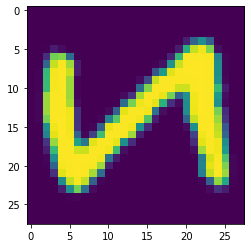

In [4]:

#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

from matplotlib import pyplot as plt
#Display a random image
plt.imshow(X_train[0])
plt.show

Process Complete: Rotated and reversed test and train images!


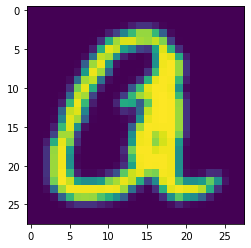

In [5]:
#for train data
for t in range(697932):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show

#for test data  
for t in range(116323):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[1])
plt.show

print('Process Complete: Rotated and reversed test and train images!')

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [7]:
X_test.shape

(116323, 784, 1)

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from tensorflow.python.keras.utils import np_utils

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)

train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)

K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

#add the layer below for an accuracy of 89%.(Training time - over 20 hours)

model.add(Convolution2D(32, (5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

model.add(Dropout(0.5))

model.add(Dense(62, activation='softmax'))

#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#opt = optimizers.Adadelta()
#opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

C:\Users\adity\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                3

In [13]:
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=10)

Epoch 1/10
5453/5453 [==============================] - 267s 49ms/step - loss: 0.4798 - accuracy: 0.8340 - val_loss: 0.4124 - val_accuracy: 0.8516
Epoch 2/10
5453/5453 [==============================] - 285s 52ms/step - loss: 0.4598 - accuracy: 0.8396 - val_loss: 0.4017 - val_accuracy: 0.8546
Epoch 3/10
5453/5453 [==============================] - 285s 52ms/step - loss: 0.4460 - accuracy: 0.8435 - val_loss: 0.3949 - val_accuracy: 0.8573
Epoch 4/10
5453/5453 [==============================] - 279s 51ms/step - loss: 0.4376 - accuracy: 0.8454 - val_loss: 0.3888 - val_accuracy: 0.8588
Epoch 5/10
5453/5453 [==============================] - 274s 50ms/step - loss: 0.4317 - accuracy: 0.8473 - val_loss: 0.3827 - val_accuracy: 0.8606
Epoch 6/10
5453/5453 [==============================] - 322s 59ms/step - loss: 0.4273 - accuracy: 0.8480 - val_loss: 0.3798 - val_accuracy: 0.8608
Epoch 7/10
5453/5453 [==============================] - 273s 50ms/step - loss: 0.4238 - accuracy: 0.8488 - val_loss: 0

In [14]:
import GPUtil
GPUtil.getAvailable()

[0]

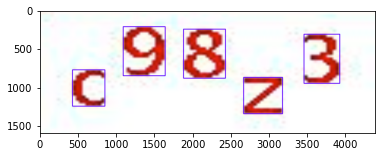

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('content/ex14.png')
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-2,y-2),( x + w + 2, y + h + 2 ),(90,0,255),9)
    
plt.imshow(dp)

In [4]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[max(y-2,0):y+h+2, max(x-2,0):x+w+2]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    m.append(roi)
    pred = model.predict_classes(t)
    pchl.append(pred)

    

pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
print(axs)
for i in range(len(pchl)):
#     print (pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)

NameError: name 'model' is not defined

In [39]:
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.models import model_from_json

model_json = model.to_json()
with open("content/model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("content/model.h5")
# Creates a HDF5 file 'model.h5'

0 3 22
1 3 23
2 3 2


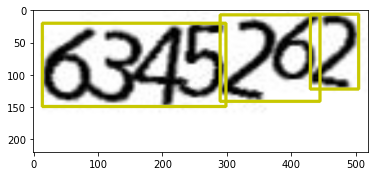

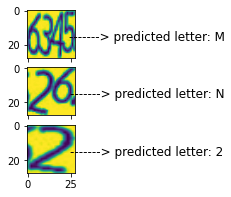

Predicted String: MN2
The final score of the participant is 0


In [7]:
import os
import cv2
import numpy as np 
from keras.models import model_from_json
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.initializers import glorot_uniform
#Reading the model from JSON file

with open('content/model.json', 'r') as json_file:
    json_savedModel= json_file.read()#load the model architecture 
model_j = tf.keras.models.model_from_json(json_savedModel)
model_j.load_weights('content/model.h5')
characters='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'


def predict(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #binary
    ret,thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)

    #dilation
    kernel = np.ones((3,3), np.uint8)
    kernel1 = np.ones((3,3), np.uint8)
    img_dilation=cv2.dilate(thresh,kernel,iterations=1)
    plt.imshow(img_dilation)
    ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if(len(ctrs)>10):
        img_erosion=cv2.erode(thresh,kernel1,iterations=1)
        #plt.imshow(img_erosion)
        img_dilation=cv2.dilate(img_erosion,kernel,iterations=1)
        ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    m = list()
   #sort contours
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    pchl = list()
    dp = image.copy()
    
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        cv2.rectangle(dp,(x-2,y-2),( x + w + 2, y + h + 2 ),(200,200,0),3)
    
    plt.imshow(dp)
    
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        # Getting ROI region of interest
        roi = image[max(y-2,0):y+h+2, max(x-2,0):x+w+2]
        roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
        
        roi = np.array(roi)
        t = np.copy(roi)
        t = t / 255.0
        t = 1-t
        t=t.reshape(-1,28,28,1)
        m.append(roi)
        pred = model_j.predict_classes(t)
#         if(pred[0]==24):
#             pred[0]=0
#         if(pred[0]==29):
#             pred[0]=7
#         if(pred[0]==37):
#             pred[0]=6
#         if(pred[0]==46):
#             pred[0]=7
#         if(pred[0]==35):
#             pred[0]=2
#         if(pred[0]==41):
#             pred[0]=9
        if(pred[0]==47):
            pred[0]=39
            
        pchl.append(pred)
    pcw = list()
    interp = 'bilinear'
    fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
    for i in range(len(pchl)):
        print (i,len(pchl),pchl[i][0])
        pcw.append(characters[pchl[i][0]])
        axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
        axs[i].imshow(m[i], interpolation=interp)
     
    plt.show()
    
    
    predstring = ''.join(pcw)
    print('Predicted String: '+predstring)  
    answer = predstring # sample needs to be modified
    return answer

def test():
   
    image_paths = ['content/ex15.png']
    correct_answers = ['2A2X999']
    score = 0

    for i,image_path in enumerate(image_paths):
        image = cv2.imread(image_path) # This input format wont change
        answer = predict(image) # a string is expected

        if correct_answers[i] == answer:
            score += 10
    
    print('The final score of the participant is',score)


if __name__ == "__main__":
    test()

In [1]:
pip install imutils 

Note: you may need to restart the kernel to use updated packages.
